<a href="https://colab.research.google.com/github/DerManjuel/MIR/blob/main/NLP_MIR_Herbst_Katz_Meyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <div>
    <h1 align="center">Excercise 05 - Medical Information Retrieval 2023</h1>
  </div>
  <br />

Today, we are moving on, towards a machine learning approach for text classification. 

## Text classification <a class="anchor" id="first"></a>

In the following 3 weeks we are focussing on machine learning approaches on our classification task. Feel free to use any tool which helps you, as long as you can explain, what exactelly is happening, and why it is useful. Given, that you know the preprocessing steps from the past weeks and are able to apply them, we want you to use them now in order to develop a machine learning model for our classification problem.

### Requirements
* The notebook should run **without any error**, given that all packages are installed and the dataset is loaded. When we test it, we will adapt path definitions and might will install nessesary packages)
* Your training/validation script should only use the train split we give you.

### Evaluation
* For evalutation, you can use the function "test_model_performance" in this notebook for accuracy, precision, recall and F1-score. If you choose to use such evaluation, the predicted labels have to be hot-encoded: The output of your model should be a vector of probabilities for each class. 
### Your tasks

* Make an exploratory data analysis
* Develop a preprocessing pipeline
* Train and test one or several machine learning models
* Evaluate the algorithms with a metric of your choice 
* Visualize the outcome

* Prepare a presentation (or present this notebook) of around 10 minutes for our last session (6th of June)


You can start from here. To have a comparable evaluation between each group, we give you a fixed train and test split.

#TODO
Introduction - Data set -what is it, why do we need it - motivation
calssification of medical reports - what are the classes

In [22]:
import pandas as pd
#Read in data - change path here
! git clone https://github.com/DerManjuel/MIR
df = pd.read_csv('MIR/Data/mtsamples_clean.csv')

fatal: destination path 'MIR' already exists and is not an empty directory.


#1) Data exploration

In [23]:
# inspect data
df.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


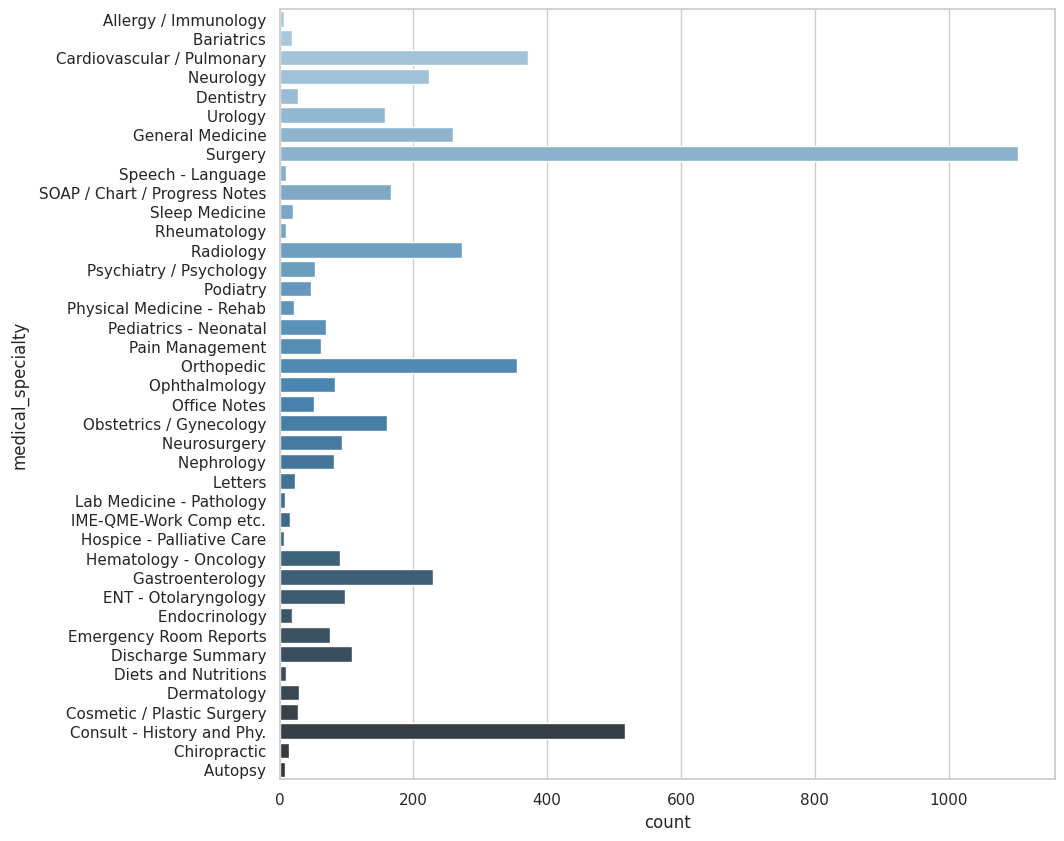

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# visualize classes (medical spezialities)
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.countplot(y='medical_specialty', data=df, palette="Blues_d")
plt.show()

#TODO
#Class Imbalance
In the figure above one can see that the data is imbalanced. There are seven classes with more than 200 reports and the other 33 classes have less than 200.

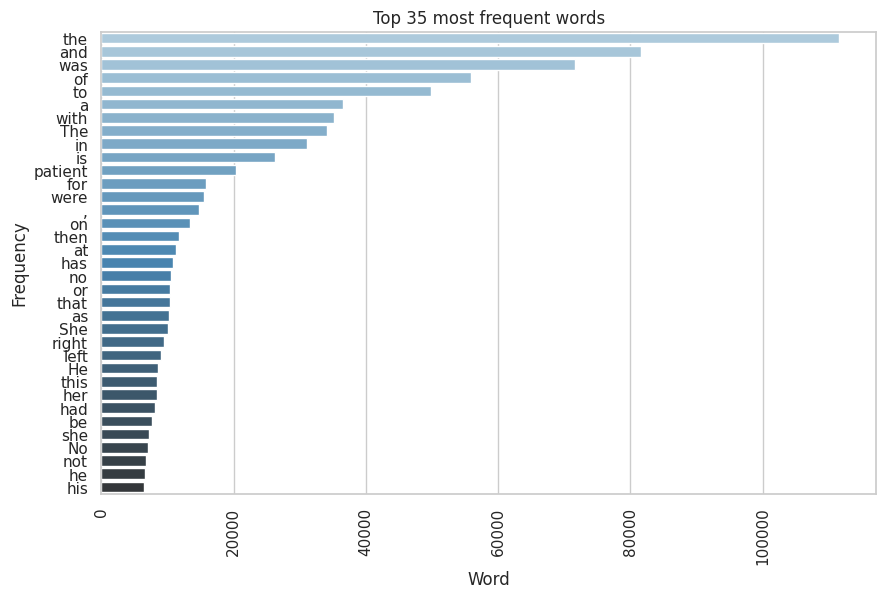

In [25]:
# visualize most frequent words
word_counts = Counter()

for note in df["transcription"]:
    word_counts += Counter(str(note).split())

# Create a dataframe of word counts
word_counts_df = pd.DataFrame.from_dict(word_counts, orient="index", columns=["count"])
word_counts_df.index.name = "word"
word_counts_df.reset_index(inplace=True)

# Filter the top 35 most frequent words
top_words = word_counts_df.nlargest(35, "count")

# Visualize the top 35 most frequent words using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=top_words, y="word", x="count", palette="Blues_d")
plt.title("Top 35 most frequent words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

#2) Preprocessing

In [26]:
import string
#Clean the data (lowercase, removing all punctuation, etc.)
# remove empty rows
df = df.dropna(subset=['transcription'])

# lowercase all transcripts
df['cleanTranscripts'] = df['transcription'].str.lower().astype(str)

# remove punctuation from the notes and replace them with a space 
df["cleanTranscripts"] = df["cleanTranscripts"].str.replace(r"[{}]".format(string.punctuation), " ")

df.head()

<ipython-input-26-cce5e900b807>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanTranscripts'] = df['transcription'].str.lower().astype(str)
<ipython-input-26-cce5e900b807>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df["cleanTranscripts"] = df["cleanTranscripts"].str.replace(r"[{}]".format(string.punctuation), " ")


,medical_specialty,transcription,cleanTranscripts
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...",subjective this 23 year old white female pr...
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...",past medical history he has difficulty climb...
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",history of present illness i have seen abc ...
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2 d m mode 1 left atrial enlargement wit...
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,1 the left ventricular cavity size and wall ...


In [30]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def unique_words_counter(df):
    # utils function to count unique words in our corpus
    word_counts = Counter()
    for s in df:
        word_counts.update(s.split())
    return word_counts

print(f'There are {len(unique_words_counter(df["cleanTranscripts"]))} unique words in our reports before stop word removal')

# list of stop words
stop_words = stopwords.words('english')
print('stop words:',stop_words)

df['cleanTranscriptsWithoutStopWords'] = df["cleanTranscripts"].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))


print(f'There are {len(unique_words_counter(df["cleanTranscriptsWithoutStopWords"]))} unique words in our reports after stop word removal')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


There are 22526 unique words in our reports before stop word removal
stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'o

As seen in the output we removed about 130 Stop Words from the data set. However most of the unique words were uneffected by the stop word removal as intended.

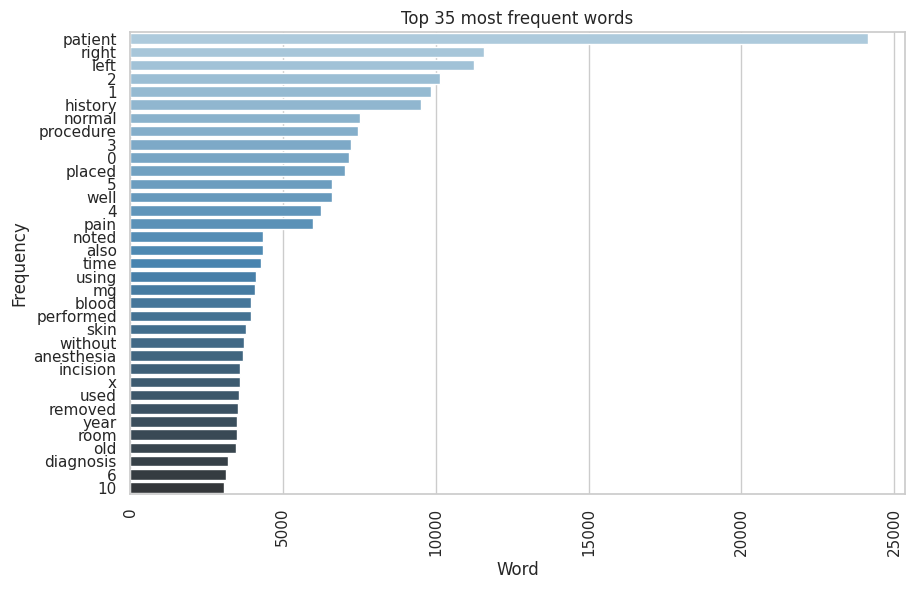

,medical_specialty,transcription,cleanTranscripts,cleanTranscriptsWithoutStopWords
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...",subjective this 23 year old white female pr...,subjective 23 year old white female presents c...
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...",past medical history he has difficulty climb...,past medical history difficulty climbing stair...
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",history of present illness i have seen abc ...,history present illness seen abc today pleasan...
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2 d m mode 1 left atrial enlargement wit...,2 mode 1 left atrial enlargement left atrial d...
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,1 the left ventricular cavity size and wall ...,1 left ventricular cavity size wall thickness ...


In [32]:
# visualize most frequent words again after stop word removal
word_counts = Counter()

for note in df["cleanTranscriptsWithoutStopWords"]:
    word_counts += Counter(str(note).split())


# Create a dataframe of word counts
word_counts_df = pd.DataFrame.from_dict(word_counts, orient="index", columns=["count"])
word_counts_df.index.name = "word"
word_counts_df.reset_index(inplace=True)
#print('word count:',word_counts)

# Filter the top 35 most frequent words
top_words = word_counts_df.nlargest(35, "count")

# Visualize the top 35 most frequent words using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=top_words, y="word", x="count", palette="Blues_d")
plt.title("Top 35 most frequent words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

df.head()

#TODO
What does tokenizer, lemmatizer, stemming do?
What are advantages?

In [34]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

# tokenize data
tokenizer = WhitespaceTokenizer()

# Tokenize the notes using whitespace tokenizer
df["tokenizedTranscripts"] = df["cleanTranscriptsWithoutStopWords"].apply(tokenizer.tokenize)

# count tokens
token_counts = Counter()

for note in df["tokenizedTranscripts"]:
    token_counts += Counter(str(note).split())

# compare word and token counts
print('word count:',word_counts)
print('token count:',token_counts)


# lemmatize words
# import stemmer fromm nltk
lemmatizer = WordNetLemmatizer()

print(f'There are {len(unique_words_counter(df["cleanTranscriptsWithoutStopWords"]))} unique words in our reports before lemmatization')

# use lemmer on the dataset
df["lemmatizedTranscripts"] = [lemmatizer.lemmatize(str(word)) for word in df["cleanTranscriptsWithoutStopWords"]] 

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


word count: Counter({'patient': 24142, 'right': 11587, 'left': 11258, '2': 10136, '1': 9840, 'history': 9509, 'normal': 7526, 'procedure': 7463, '3': 7228, '0': 7174, 'placed': 7028, '5': 6614, 'well': 6611, '4': 6263, 'pain': 5976, 'noted': 4348, 'also': 4337, 'time': 4287, 'using': 4123, 'mg': 4087, 'blood': 3956, 'performed': 3953, 'skin': 3798, 'without': 3732, 'anesthesia': 3707, 'incision': 3601, 'x': 3585, 'used': 3554, 'removed': 3532, 'year': 3504, 'room': 3502, 'old': 3463, 'diagnosis': 3212, '6': 3134, '10': 3084, 'general': 3064, 'artery': 3027, 'anterior': 2932, 'taken': 2816, 'back': 2731, 'disease': 2685, 'past': 2674, 'chest': 2631, 'examination': 2578, 'position': 2576, 'two': 2562, 'dr': 2562, 'area': 2557, 'one': 2494, 'mm': 2466, 'lower': 2462, 'fashion': 2445, 'neck': 2424, 'negative': 2374, 'present': 2368, 'made': 2352, 'upper': 2324, 'pressure': 2284, 'cm': 2279, 'closed': 2279, 'good': 2276, 'medications': 2256, 'posterior': 2254, '7': 2243, 'postoperative': 22

,medical_specialty,transcription,cleanTranscripts,cleanTranscriptsWithoutStopWords,tokenizedTranscripts,lemmatizedTranscripts
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr...",subjective this 23 year old white female pr...,subjective 23 year old white female presents c...,"[subjective, 23, year, old, white, female, pre...",subjective 23 year old white female presents c...
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb...",past medical history he has difficulty climb...,past medical history difficulty climbing stair...,"[past, medical, history, difficulty, climbing,...",past medical history difficulty climbing stair...
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",history of present illness i have seen abc ...,history present illness seen abc today pleasan...,"[history, present, illness, seen, abc, today, ...",history present illness seen abc today pleasan...
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2 d m mode 1 left atrial enlargement wit...,2 mode 1 left atrial enlargement left atrial d...,"[2, mode, 1, left, atrial, enlargement, left, ...",2 mode 1 left atrial enlargement left atrial d...
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,1 the left ventricular cavity size and wall ...,1 left ventricular cavity size wall thickness ...,"[1, left, ventricular, cavity, size, wall, thi...",1 left ventricular cavity size wall thickness ...


#Divide the dataset into train and test set

Only use X and y_one_hot or y_classes for training purposes in the rest of the notebook. After running the whole notebook, there should be a prediction from your model, which took X_test as input to create the predictions. Each prediction has to be a vector of length 40.

In [35]:
#read in data into 
_X = df['lemmatizedTranscripts'] #TODO .values wieder hinzufügen??
_y = df['medical_specialty']

#one hot encoding of the labels - creates a binary column for each category and returns a dense array
_y_one_hot = pd.get_dummies(_y)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences

#Vectorize the report texts into a matrix of token counts
_X = CountVectorizer().fit_transform(_X)
_X = _X.toarray()

_X=pad_sequences(_X,padding="post",truncating='post',maxlen=14000)

#TODO: why do we do pad_sequences? how does this function work? advantages?

In [69]:
from torch.utils.data import DataLoader
X_train, X_test, y_one_hot, y_one_hot_test = train_test_split(_X, _y_one_hot, test_size=0.2, random_state=123)
_, _, y_classes, _ = train_test_split(_X, _y, test_size=0.2, random_state=123)

print("One hot encoded labels: \n", y_one_hot.values)
print("Shape of X_train and y_train encoded labels:", X_train.shape,y_one_hot.shape)
print("Shape of X_test and y_test:", X_test.shape,y_one_hot_test.shape)

train_dataset = list(zip(X_train, y_one_hot.values))
loader = DataLoader(train_dataset, shuffle=True, batch_size=150, drop_last=True)

One hot encoded labels: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of X_train and y_train encoded labels: (3972, 14000) (3972, 40)
Shape of X_test and y_test: (994, 14000) (994, 40)


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_model_performance(y_pred, y_test):
    #_, _, _, y_test = train_test_split(_X, _y_one_hot, test_size=0.2, random_state=123)
    
    y_pred = y_pred.detach().numpy()
    # set highest to 1 and rest to 0
    y_pred = np.argmax(y_pred, axis=1)   
    y_pred = torch.tensor(y_pred)
    #print("evaluate", type(y_pred))
    y_test = np.argmax(y_test, axis=1)

    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('F1: ', f1_score(y_test, y_pred, average='weighted'))

In [71]:
import numpy as np
### performance of a random guesser ###

y_pred_dummy = np.zeros((len(X_test), 40))
# random predictions with sum 1
y_pred_dummy = y_pred_dummy + np.random.rand(y_pred_dummy.shape[0], y_pred_dummy.shape[1])
y_pred_dummy = y_pred_dummy / y_pred_dummy.sum(axis=1).reshape(-1, 1)

# set only highest value to 1 and rest to 0
y_pred_dummy = np.argmax(y_pred_dummy, axis=1)
y_pred_dummy = pd.get_dummies(y_pred_dummy).values

test_model_performance(y_pred_dummy,y_one_hot_test)

Accuracy:  0.03118712273641851
Precision:  0.09741122267410432
Recall:  0.03118712273641851
F1:  0.041104111299586764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Our Model

#TODO: what did we try?
- Random Forest
- Naive Bayes
- LSTM

how did they work?
why did they not work?
why did we decided for them?

In [109]:
import torch
import torch.nn as nn

class LSTM(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 40)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [110]:
import torch.optim as optim

VOCAB_SIZE = 14000
EMBEDDING_DIM = 4
HIDDEN_DIM = 4

model = LSTM(vocab_size=VOCAB_SIZE, embedding_dim=EMBEDDING_DIM, hidden_dim=HIDDEN_DIM)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

In [112]:
def train():
    n_epochs = 10
    for epoch in range(n_epochs):
      model.train()
      for X_batch, y_batch in loader:
          y_pred = model(X_batch)
          loss = loss_fn(y_pred, y_batch.float())
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      
      print("Epoch: %d, train loss: %1.5f" % (epoch, loss.item()))    
      test_model_performance(y_pred, y_batch)

      # Validation
      if epoch % 100 != 0:
          continue
      model.eval()

      with torch.no_grad():
        test_pred = model(X_test)
        #test_model_performance(y_pred, y_one_hot_test)

    return y_pred, test_pred

In [114]:
train_pred, test_pred = train()

Epoch: 0, train loss: 0.10931
Accuracy:  0.013333333333333334
Precision:  0.00017777777777777779
Recall:  0.013333333333333334
F1:  0.0003508771929824561


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: ignored

In [ ]:
test_model_performance(train_pred, y_one_hot)
test_model_performance(test_pred, y_one_hot_test)

In [ ]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_one_hot_test, test_pred, output_dict=True)

# change figsize
plt.figure(figsize=(20, 10))
report_df = pd.DataFrame(report).iloc[:-1, :].T

sns.heatmap(pd.DataFrame(report_df), annot=True)

In [ ]:
plt.plot(y_one_hot_test, label="Actual Data")
plt.plot(test_pred, label="LSTM Predictions")
plt.savefig("small_plot.png", dpi=300)
plt.show();

#TODO: Results
what results did we get?
how do we interpredt them?